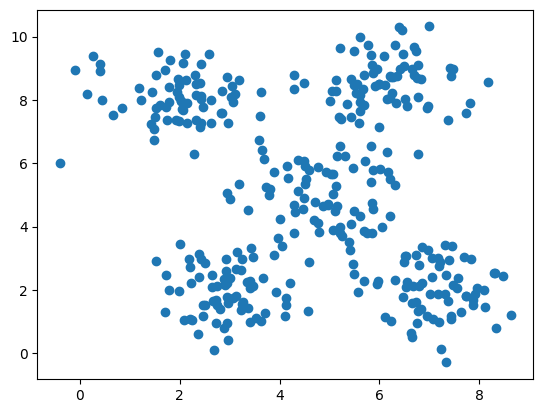

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt('data_clustering.txt', delimiter = ',')
plt.scatter(X[:,0], X[:,1])
plt.show()
K = 5

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Кластеризация иерархическим методом AglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=K, linkage="ward", metric="euclidean")
res = clustering.fit_predict(X)

def ward(x_i, x_j):
    n_i = len(x_i)
    n_j = len(x_j)
    m1 = np.mean(x_i, axis = 0)
    m2 = np.mean(x_j, axis = 0)
    metrics = np.sum((m1-m2)**2)**0.5
    return n_i*n_j/(n_i+n_j)*metrics**2

def Agglomerative_clusters(X,K):

    labels = np.arange(len(X))#метки кластеров
    clasters = [[x] for x in X]
    while len(clasters) > K:
        mn = float('+inf')
        for i in range(len(clasters)-1):
            for j in range(i+1, len(clasters)):
                m = ward(clasters[i],clasters[j])
                if m<mn:
                    mn = m
                    mn_ind = (i,j)
        labels[labels == mn_ind[1]] = mn_ind[0]
        labels[labels > mn_ind[1]] -= 1

        clasters[mn_ind[0]].extend(clasters.pop(mn_ind[1]))
    return labels

marks = Agglomerative_clusters(X,K)
marks

array([0, 1, 2, 3, 4, 0, 1, 2, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 0, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 0, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 0, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 4, 2, 3, 4, 0, 1, 2, 3, 2, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 2, 0,

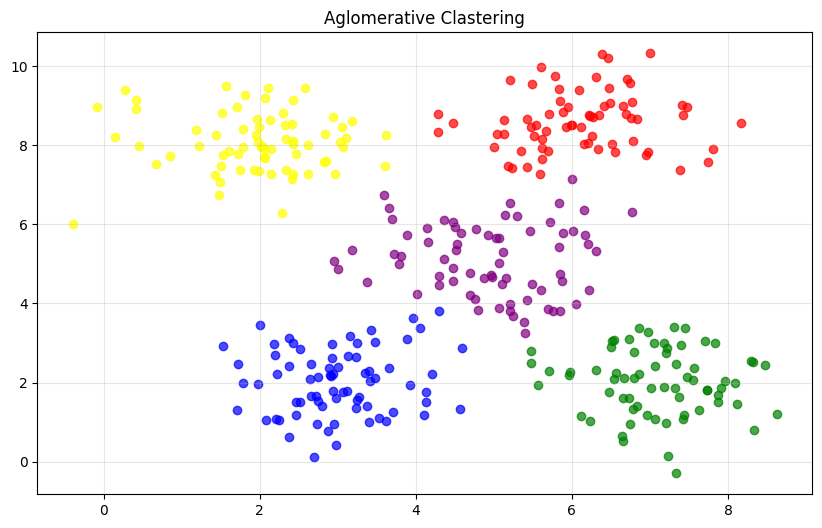

In [ ]:
colors = ['blue', 'yellow', 'purple', 'green', 'red']
plt.figure(figsize = (10,6))
for i in range(K):
  plt.scatter(X[marks == i][:,0], X[marks == i][:,1], color = colors[i], alpha = 0.7)

plt.grid(True, alpha = 0.3)
plt.title('Aglomerative Clastering')
plt.show()

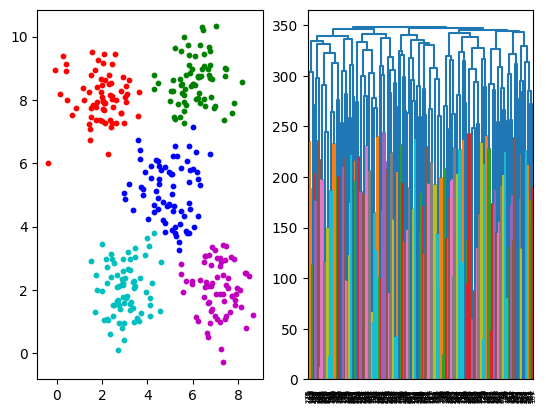

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
f, ax = plt.subplots(1, 2)
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(K)):
    clst = X[res == n].T
    ax[0].scatter(clst[0], clst[1], s=10, color=c)
plot_dendrogram(clustering, ax=ax[1])
plt.show()

In [ ]:
#метод k-средних (KMeans)
n_init = 8 #количество итераций
M = np.mean(X, axis = 0)
D = np.var(X, axis = 0)
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for i in range(K)]#центры
metrics = lambda x,y: np.mean((x-y)**2, axis = 0)
ma_0 = ma
while n_init!=0:
  clusters = [[] for i in range(K)]
  for i in X:
    all_len = [metrics(i,j) for j in ma]
    ind = np.argmin(all_len)
    clusters[ind].append(i)
  ma = [np.mean(i, axis = 0) for i in clusters]
  n_init -= 1

clusters = [np.array(cluster) for cluster in clusters]


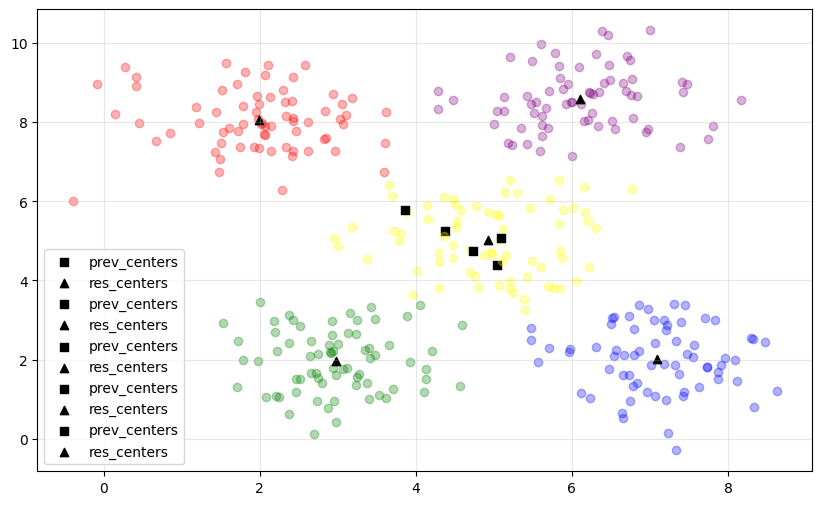

In [ ]:
colors = ['blue', 'yellow', 'purple', 'green', 'red']
plt.figure(figsize = (10,6))

for i in range(K):
  plt.scatter(ma_0[i][0], ma_0[i][1], color = 'black', alpha =1 , marker = 's', label = 'prev_centers')
  plt.scatter(clusters[i][:,0], clusters[i][:,1], color = colors[i], alpha = 0.3)
  plt.scatter(ma[i][0], ma[i][1], color = 'black', alpha = 1, marker = '^', label = 'res_centers')

plt.grid(True, alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Реализация классификации методом MeanShift
X= np.loadtxt('data_clustering.txt', delimiter = ',')


def gaus_kernel(x):
  return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)



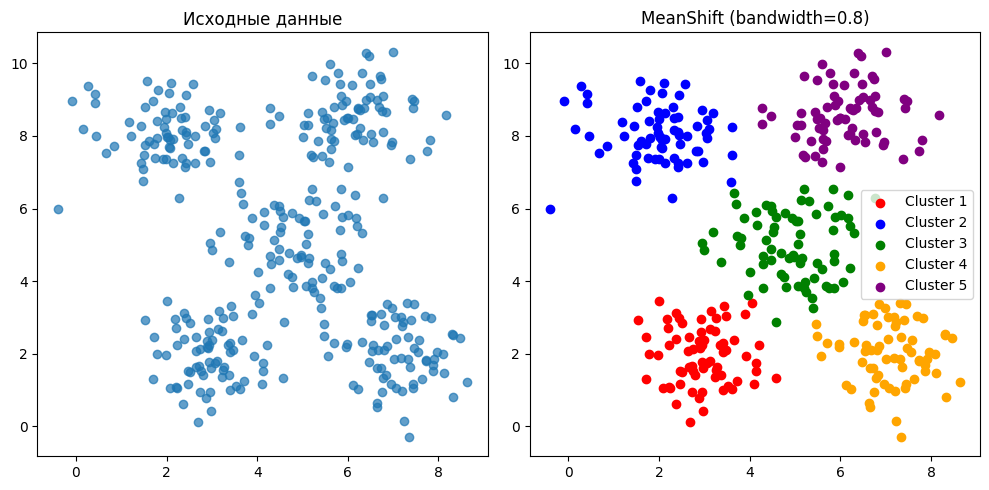

Кластеров: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
'''MeanShift ищет области высокой плотности. Взвешенное среднее естественным образом "притягивает" точки к модам распределения, потому что:

В плотных областях много близких точек → большие веса → точка движется туда

В разреженных областях мало близких точек → маленькие веса → точка уходит оттуда'''


X= np.loadtxt('data_clustering.txt', delimiter = ',')


def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * (distance / bandwidth) ** 2)

def mean_shift_simple(X, bandwidth=0.8, max_iter=300):
    centroids = X.copy()#каждая точка как центр кластера

    for _ in range(max_iter):
        for i in range(len(X)):
            distances = np.linalg.norm(centroids[i] - X, axis=1)
            weights = gaussian_kernel(distances, bandwidth)
            new_centroid = np.sum(weights[:, np.newaxis] * X, axis=0) / np.sum(weights)#взвешанное среднее
            centroids[i] = new_centroid#сдвиг центроид

    # Группируем в кластеры
    clusters = []
    used = set()
    # Нахождение всех центроид в пределах bandwidth от текущего
    for i in range(len(centroids)):
        if i in used:#пропуск использованных
            continue
        cluster_points = []
        for j in range(len(centroids)):
            if np.linalg.norm(centroids[i] - centroids[j]) < bandwidth:
                cluster_points.append(j)
                used.add(j)
        clusters.append(cluster_points)

    return clusters


bandwidth = 0.8
clusters2 = mean_shift_simple(X, bandwidth=bandwidth, max_iter=300)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Исходные данные")

plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1],
                color=colors[i % len(colors)],
                label=f'Cluster {i+1}')

plt.title(f"MeanShift (bandwidth={bandwidth})")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Кластеров: {len(clusters)}")


In [ ]:
labels_mean_shift = np.full(len(X), -1, dtype=int)
cluster_id = 0

for cluster_points in clusters2:
    if cluster_points:  # если кластер не пустой
        for point_idx in cluster_points:
            labels_mean_shift[point_idx] = cluster_id
        cluster_id += 1
labels_mean_shift

array([0, 1, 2, 3, 4, 0, 1, 2, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 0, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 1, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 4, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 2, 0,

In [ ]:
labels_kmeans= np.full(len(X), -1, dtype=int)
cluster_id = 0

for cluster_points in clusters:
    if cluster_points:  # если кластер не пустой
        for point_idx in cluster_points:
            labels_kmeans[point_idx] = cluster_id
        cluster_id += 1
labels_kmeans

array([0, 1, 2, 3, 4, 0, 1, 2, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 0, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 1, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 4, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 2, 0,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
'''Метрика показывает, насколько кластеры:
1.Компактны (точки внутри кластера близки друг к другу)
2.Хорошо разделены (кластеры далеко друг от друга)'''

X = np.loadtxt('data_clustering.txt', delimiter=',')
db_hier = davies_bouldin_score(X, marks)
print(f"   Davies-Bouldin Index: {db_hier:.4f}")

db_kmeans = davies_bouldin_score(X,  labels_kmeans)
print(f"   Davies-Bouldin Index: {db_kmeans:.4f}")
db_mean_shift = davies_bouldin_score(X, labels_mean_shift)
print(f"   Davies-Bouldin Index: {db_mean_shift:.4f}")

   Davies-Bouldin Index: 0.5575
   Davies-Bouldin Index: 0.5542
   Davies-Bouldin Index: 0.5542


k=2: silhouette score=0.4776
k=3: silhouette score=0.5472
k=4: silhouette score=0.5795
k=5: silhouette score=0.5890
k=6: silhouette score=0.6097
k=7: silhouette score=0.5630
k=8: silhouette score=0.4978
k=9: silhouette score=0.4631
k=10: silhouette score=0.4231


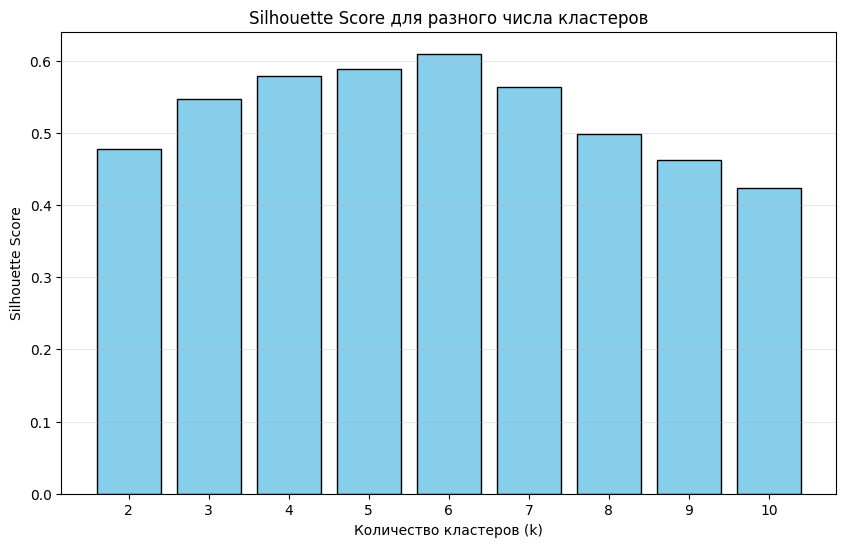


Оптимальное количество кластеров: k=6
Лучший silhouette score: 0.6097


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
'''метрика для оценки качества кластеризации, которая показывает, насколько хорошо каждая точка отнесена к своему кластеру.
Силуэт показывает для каждой точки:
1.Насколько она похожа на точки своего кластера
2.Насколько она отличается от точек других кластеров
Ближе к 1 - точка хорошо отнесена к своему кластеру
Около 0 - точка на границе между кластерами
Ближе к -1 - точка отнесена не к тому кластеру'''

X = np.loadtxt('data_quality.txt', delimiter = ',')


k_range = range(2, 11)
scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k={k}: silhouette score={score:.4f}")

#Гистограмма
plt.figure(figsize=(10, 6))
bars = plt.bar(k_range, scores, color='skyblue', edgecolor='black')

#оптимальное k
optimal_k = k_range[np.argmax(scores)]
optimal_score = max(scores)


plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разного числа кластеров')
plt.xticks(k_range)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print(f"\nОптимальное количество кластеров: k={optimal_k}")
print(f"Лучший silhouette score: {optimal_score:.4f}")